Метод опорных векторов (SVM, от англ. Support Vector Machine) — это мощный
инструмент для классификации, который отлично справляется с задачами, где нужно чётко
разделить данные на группы. Основная идея SVM заключается в том, чтобы найти
наилучшую границу, которая максимально разделяет объекты разных классов. Эта граница
называется гиперплоскостью.
Представим простую ситуацию: у нас есть два типа клиентов — те, кто совершает
покупки в интернет-магазине, и те, кто просто просматривает товары. Если нанести их
данные на график, можно увидеть, что между ними существует определённое разделение.
SVM находит такую линию (или плоскость в более сложных случаях), которая расположена
как можно дальше от объектов каждого класса. Это важно, потому что чем больше "зазор"
между классами, тем устойчивее модель к ошибкам и новым данным.
Особенность SVM в том, что для построения границы он опирается не на все
данные, а только на те объекты, которые находятся ближе всего к границе. Эти точки
называются опорными векторами. Именно они определяют положение разделяющей
линии.
Иногда данные невозможно разделить прямой линией. Например, если классы
переплетаются или имеют сложную форму. В таких случаях SVM использует специальные
методы, чтобы "разогнуть" пространство данных и найти границу в более высоком
измерении. Этот подход позволяет решать задачи с нелинейной структурой данных.

Пример 1. Есть данные о клиентах, и мы хотим разделить их на две группы:
- Активные покупатели — те, кто часто совершает покупки.
- Редкие посетители — те, кто просто просматривает товары.
Мы используем два признака:
- Частота посещений сайта (количество визитов в месяц).
- Средний чек (сумма одной покупки).

In [14]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [15]:
data = load_breast_cancer()
X = data.data # Признаки (размеры, формы клеток)
y = data.target # Целевая переменная (0 - злокачественная, 1 - доброкачественная)

In [16]:
# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#

In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
model = SVC(kernel='linear')

In [19]:
model.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [20]:
y_pred = model.predict(X_test_scaled)

In [21]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели SVM: {accuracy * 100:.2f}%")

Точность модели SVM: 97.66%


In [22]:
# Визуализация гиперплоскости для двумерных данных (выбираем два признака для простоты)
X_train_2d = X_train_scaled[:, :2] # Используем только два признака
model_2d = SVC(kernel='linear')
model_2d.fit(X_train_2d, y_train)

SVC(kernel='linear')

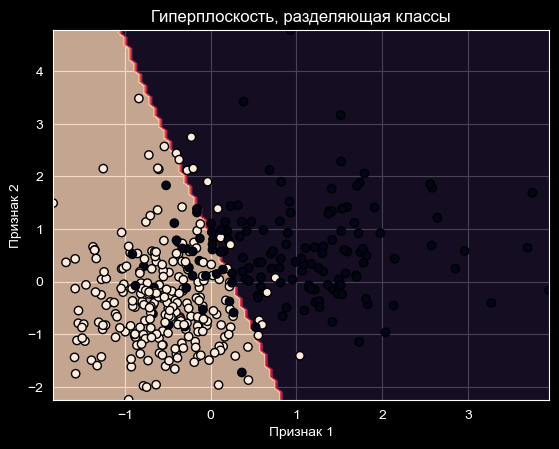

In [23]:
# Построение графика
xx, yy = np.meshgrid(np.linspace(X_train_2d[:, 0].min(), X_train_2d[:, 0].max(), 100),
np.linspace(X_train_2d[:, 1].min(), X_train_2d[:, 1].max(), 100))
Z = model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, edgecolors='k', marker='o')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.title('Гиперплоскость, разделяющая классы')
plt.show()

Пример 2

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [27]:
data = {
'Частота_посещений': [5, 15, 3, 20, 7, 12, 2, 18, 4, 14],
'Средний_чек': [30, 70, 20, 90, 35, 65, 25, 85, 28, 75],
'Активный_покупатель': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1] # 1 — активный, 0 — редкий
}

In [28]:
df = pd.DataFrame(data)

In [29]:
X = df[['Частота_посещений', 'Средний_чек']]
y = df['Активный_покупатель']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
model = SVC(kernel='linear', probability=True)
model.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [32]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность модели: {accuracy:.2f}')

Точность модели: 1.00


In [33]:
new_client = pd.DataFrame({
'Частота_посещений': [10],
'Средний_чек': [60]
})

In [34]:
class_model = model.predict(new_client)[0]
probably = model.predict_proba(new_client)[0][1]
print(f'Клиент классифицирован как: {"Активный покупатель" if class_model == 1 else "Редкий посетитель"}')
print(f'Вероятность быть активным покупателем: {probably:.2f}')

Клиент классифицирован как: Активный покупатель
Вероятность быть активным покупателем: 0.64


In [35]:
plt.figure(figsize=(8, 6))
for i, label in enumerate(['Редкий посетитель', 'Активный покупатель']):
    plt.scatter(df[df['Активный_покупатель'] == i]['Частота_посещений'],df[df['Активный_покупатель'] ==i]['Средний_чек'],
    label=label)

In [36]:
plt.scatter(new_client['Частота_посещений'], new_client['Средний_чек'],
color='purple', marker='X', s=200, label='Новый клиент')

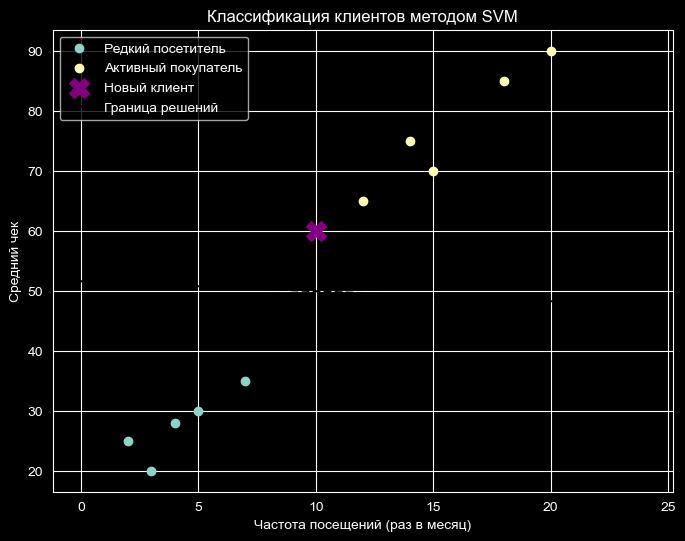

In [13]:
w = model.coef_[0]
b = model.intercept_[0]
x_points = range(0, 25)
y_points = [-(w[0] * x + b) / w[1] for x in x_points]
plt.plot(x_points, y_points, color='black', linestyle='--', label='Граница решений')
plt.xlabel('Частота посещений (раз в месяц)')
plt.ylabel('Средний чек')
plt.title('Классификация клиентов методом SVM')
plt.legend()
plt.grid(True)
plt.show()